In [3]:
#imports
import numpy as np
import pandas as pd

import csv
from sklearn import decomposition
from pandas import Series, DataFrame
from math import log

1.2 ID3 Decision Tree
In Figure 1 you can find the Tennis data from the example we used at Lecture 5 on describing the ID3
algorithm.

In [4]:
data = pd.read_csv('tennis.csv', header = 0)
data

,Day,Outlook,Temperature,Humidity,Wind,PlayTennis,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,D1,Sunny,Hot,High,Weak,No,NaN,NaN,NaN,NaN,NaN,NaN
1,D2,Sunny,Hot,High,Strong,No,NaN,NaN,NaN,NaN,NaN,NaN
2,D3,Overcast,Hot,High,Weak,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,D4,Rain,Mild,High,Weak,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,D5,Rain,Cool,Normal,Weak,Yes,NaN,NaN,NaN,NaN,NaN,NaN
5,D6,Rain,Cool,Normal,Strong,No,NaN,NaN,NaN,NaN,NaN,NaN
6,D7,Overcast,Cool,Normal,Strong,Yes,NaN,NaN,NaN,NaN,NaN,NaN
7,D8,Sunny,Mild,High,Weak,No,NaN,NaN,NaN,NaN,NaN,NaN
8,D9,Sunny,Cool,Normal,Weak,Yes,NaN,NaN,NaN,NaN,NaN,NaN
9,Dl0,Rain,Mild,Normal,Weak,Yes,NaN,NaN,NaN,NaN,NaN,NaN


The Entropy of a set S is given by:

<img src="Entropy.png">

where C is the number of classes (2 in
our case since we have a positive and a negative class) and pc is the frequency of class c in the set S.

In [5]:
data.iloc[:,(1,-7)]

,Outlook,PlayTennis
0,Sunny,No
1,Sunny,No
2,Overcast,Yes
3,Rain,Yes
4,Rain,Yes
5,Rain,No
6,Overcast,Yes
7,Sunny,No
8,Sunny,Yes
9,Rain,Yes


In [6]:
#Write a function that computes the Entropy of a set S with Npos positive observations and Nneg negative
#observations
def Entropy(pos,neg):

    totalobser = (pos + neg)*1.00
    SumEntropy = 0.0
    if neg > 0 and pos >0:
        SumEntropy =  ((neg / totalobser) * np.log2(neg/totalobser))+((pos / totalobser) * np.log2(pos/totalobser)) 
    else:
        SumEntropy = 0        
    return SumEntropy*(-1)  
    print SumEntropy*(-1) 

In [7]:
Entropy(1,2)

0.91829583405448956

<img src="gain.png">

Write a function that takes as input a set S of observations and an attribute A from these observations,
and calculates the Information Gain, denoted as Gain(S;A), as if we were to split on that attribute in the
context of the ID3 decision tree algorithm.

In [8]:
def Gain(S,A):
    #Get the unique cases inside the attribute selected
    cases=np.unique(S)
    pos = 1.0 * np.sum(S == "Yes")
    neg = 1.0 * np.sum(S == "No")
    
    # Entropy of S (using the last function that we already create)
    SumGain = Entropy(pos,neg)
    # Total of the elements in S
    N = len(S) * 1.0
    # Make a loop over each unique case inside the attribute A 
    for attribute in np.unique(A):
        # Get the number of elements in the attributes
        Nattribute = len(S[A == attribute]) * 1.0
        # Get the positive and negative elements in the attribute selected
        pos1 = 1.0 * np.sum((S == "Yes") & (A == attribute))
        neg2 = 1.0 * np.sum((S == "No") & (A == attribute))
        #Gain formula
        SumGain = SumGain - (Nattribute/N) * Entropy(pos1,neg2)
    return SumGain

In [9]:
GainOutlook = Gain(data['PlayTennis'],data['Outlook'])
GainOutlook

0.24674981977443933

In [10]:
#Estimate the Information Gain of all the attributes. Which one would you choose for the root node of
#your decision tree?
GainOutlook = Gain(data['PlayTennis'],data['Outlook'])
GainTemperature = Gain(data['PlayTennis'],data['Temperature'])
GainHumidity = Gain(data['PlayTennis'],data['Humidity'])
GainWind = Gain(data['PlayTennis'],data['Wind'])

In [11]:
print "Gain for:\nOutlook: %s\nTemperature: %s\nHumidity: %s\nWind: %s"%(GainOutlook,GainTemperature,GainHumidity,GainWind)

Gain for:
Outlook: 0.246749819774
Temperature: 0.029222565659
Humidity: 0.151835501362
Wind: 0.0481270304083


**We choose the root node with more information which is Outlook**

In [38]:

Attributes = list(data.columns[:-7])



In [46]:
Attributes 

['Day', 'Outlook', 'Temperature', 'Humidity', 'Wind']

**Plot and examine the performance of your bagging ensemble as you vary the number of samples and attributes used.**

In [48]:
import matplotlib.pyplot as plt
%pylab inline
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

Populating the interactive namespace from numpy and matplotlib


In [49]:
#Store the names of the attributes in a DataFrame
X = data[['Outlook','Temperature','Humidity','Wind']]

In [50]:
X

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak
5,Rain,Cool,Normal,Strong
6,Overcast,Cool,Normal,Strong
7,Sunny,Mild,High,Weak
8,Sunny,Cool,Normal,Weak
9,Rain,Mild,Normal,Weak


In [51]:
#Assign a number to each category of the attribute
Outlook1 = [2 if x == 'Sunny' else 1 if x == 'Overcast' else 0 for x in data.Outlook]
Outlook1

[2, 2, 1, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 0]

In [52]:
Temperature1 = [2 if x == 'Hot' else 1 if x == 'Mild' else 0 for x in data.Temperature]
Humidity1 = [1 if x == 'High' else 0 for x in data.Humidity]
Wind1 = [1 if x == 'Weak' else 0 for x in data.Wind]
PlayTennis1 = [1 if x =='Yes' else 0 for x in data.PlayTennis]

In [53]:
#Store this new data in a dataframe
Data = pd.DataFrame({'Outlook':Outlook1,'Temperature':Temperature1,'Humidity':Humidity1,'Wind':Wind1,'PlayTennis':PlayTennis1},index=data.Day)

In [54]:
Data

,Humidity,Outlook,PlayTennis,Temperature,Wind
Day,,,,,
D1,1,2,0,2,1
D2,1,2,0,2,0
D3,1,1,1,2,1
D4,1,0,1,1,1
D5,0,0,1,0,1
D6,0,0,0,0,0
D7,0,1,1,0,0
D8,1,2,0,1,1
D9,0,2,1,0,1


In [55]:
#My attributes are the name of each column without "playTennis" wich is my target
attributes = np.extract(np.array(Data.columns) != 'PlayTennis',np.array(Data.columns))
#The observation in this specific data set are in "PlayTennis" column
observ = Data.PlayTennis

In [56]:
import matplotlib.pyplot as plt
%pylab inline
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import decomposition
from sklearn.metrics import accuracy_score


Populating the interactive namespace from numpy and matplotlib


In [60]:
#DataFrame with performance
list_ = []
#This first loop goes over all the elements in the sample
for i in range(1,15):
    #This second loop goes over all the attributes in the sample
    for j in range(1,5):
        bagging = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=i, max_features=j).fit(Data[attributes],observ)
        predictions = bagging.predict(Data[attributes])
        list_.append(accuracy_score(observ,predictions))

performance = pd.DataFrame(list_)

In [61]:
performance

,0
0,0.642857
1,0.357143
2,0.642857
3,0.642857
4,0.642857
5,0.642857
6,0.642857
7,0.785714
8,0.642857
9,0.714286


In [58]:
performance.columns=['Accuracy']

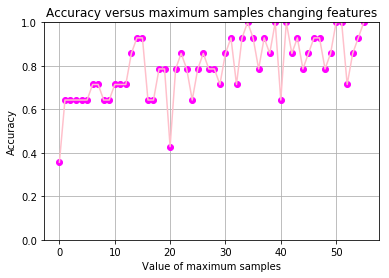

In [59]:
plt.plot(performance,'o', color='magenta')
plt.plot(performance, color='pink')
plt.xlabel('Value of maximum samples')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.grid()
plt.title('Accuracy versus maximum samples changing features')

**We can observe here that when we increase the number of samples we can 
 also increase the accuracy, but for example when we have 41 samples aprox. it decrease faster, so the variance increase too much compared with the variance with less samples**